In [1]:
from scraper import page_links, textfromlink, textfromtitles
from preprocessing import text_data

In [2]:
# Let's assign a variable named 'url' to the website we intend to scrape
url = 'http://shakespeare.mit.edu/'

In [3]:
# Let's extract the home_links and internal_links from the entire website
home_links, internal_links = page_links(url)

In [4]:
# Let's extract the text from each internal_link and stitch them together into a single string
full_text = textfromlink(internal_links)

In [5]:
# Let's extract the clean_word_tokens, filtered_clean_word_tokens, tagged_filtered_clean_word_tokens, word_tokens, sent_tokens, words_fdist, namedEnt
clean_word_tokens, filtered_clean_word_tokens, tagged_filtered_clean_word_tokens, word_tokens, sent_tokens, words_fdist, namedEnt = text_data(full_text)

In [6]:
# Looking into all the variables created
%whos

Variable                            Type        Data/Info
---------------------------------------------------------
clean_word_tokens                   list        n=835941
filtered_clean_word_tokens          list        n=409798
full_text                           str         In delivering my son from<...>nts may ne'er it ruinate.
home_links                          list        n=43
internal_links                      list        n=945
namedEnt                            Tree        (S\n  delivering/VBG\n  s<...>B\n  er/NN\n  ruinate/NN)
page_links                          function    <function page_links at 0x0000022DA92D1E18>
sent_tokens                         list        n=53829
tagged_filtered_clean_word_tokens   list        n=409798
text_data                           function    <function text_data at 0x0000022DA9BBBE18>
textfromlink                        function    <function textfromlink at 0x0000022DA98B7D08>
textfromtitles                      function    <function textfro

In [7]:
# Let's look at the Frequency Distribution dictionary
words_fdist

FreqDist({('shall', 'MD'): 3600, ('thou', 'NN'): 3157, ('thy', 'JJ'): 3090, ('good', 'JJ'): 2843, ('would', 'MD'): 2326, ('well', 'RB'): 2223, ('lord', 'NN'): 2134, ('man', 'NN'): 2004, ('one', 'CD'): 1757, ('like', 'IN'): 1755, ...})

In [8]:
def plot_freqdist_freq(fdist,
                       max_num=None,
                       cumulative=False,
                       title='Frequency plot',
                       linewidth=2):
    """
    As of NLTK version 3.2.1, FreqDist.plot() plots the counts 
    and has no kwarg for normalising to frequency. 
    Work this around here.
    
    INPUT:
        - the FreqDist object
        - max_num: if specified, only plot up to this number of items 
          (they are already sorted descending by the FreqDist)
        - cumulative: bool (defaults to False)
        - title: the title to give the plot
        - linewidth: the width of line to use (defaults to 2)
    OUTPUT: plot the freq and return None.
    
    Code from: https://martinapugliese.github.io/plotting-the-actual-frequencies-in-a-FreqDist-in-nltk/
    Author: Martina Pugliese, Edinburgh, Scotland
    """

    tmp = fdist.copy()
    norm = fdist.N()
    for key in tmp.keys():
        tmp[key] = float(fdist[key]) / norm

    if max_num:
        tmp.plot(max_num, cumulative=cumulative,
                 title=title, linewidth=linewidth)
    else:
        tmp.plot(cumulative=cumulative, 
                 title=title, 
                 linewidth=linewidth)

    return

In [9]:
# Let's plot the normalized word frequency distribution for the Top 30 words
plot_freqdist_freq(words_fdist, max_num=30)

<Figure size 640x480 with 1 Axes>

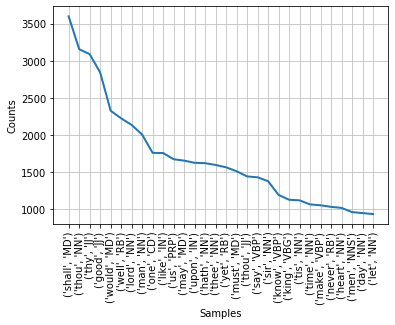

In [10]:
# Let's plot the counts of the frequency distribution for the Top 30 words
words_fdist.plot(30)

In [11]:
titles_texts = textfromtitles(internal_links)
print('No. of titles: ', len(titles_texts))

No. of titles:  945


In [12]:
titles_texts[0]

"In delivering my son from me, I bury a second husband. And I in going, madam, weep o'er my father's death anew: but I must attend his majesty's command, to whom I am now in ward, evermore in subjection. You shall find of the king a husband, madam; you, sir, a father: he that so generally is at all times good must of necessity hold his virtue to you; whose worthiness would stir it up where it wanted rather than lack it where there is such abundance. What hope is there of his majesty's amendment? He hath abandoned his physicians, madam; under whose practises he hath persecuted time with hope, and finds no other advantage in the process but only the losing of hope by time. This young gentlewoman had a father,--O, that 'had'! how sad a passage 'tis!--whose skill was almost as great as his honesty; had it stretched so far, would have made nature immortal, and death should have play for lack of work. Would, for the king's sake, he were living! I think it would be the death of the king's dis